## Data & Analytics - Proyecto Final
Ana Lucía Palacios De La Borda
GRUPO 2:
- Jheny Jorge Zelaya
- Sofía Solís Quevedo
- Eduardo Alonso Mamani Hernandez
- Gino Vasquez Delgado
- Lizbeth Cristina Centeno Saire
- Valeria Zared Gomez Mejia

## Caso de uso

HR Analytics: https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/

## Importación de librerías

In [166]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

seed = 2020
sns.set()

Se utiliza la librería warnings para evitar que se muestren alertas al crear nuevas columnas

In [167]:
import warnings
warnings.filterwarnings('ignore')

In [168]:
pd.__version__

'2.2.3'

In [169]:
np.__version__

'2.1.3'

In [170]:
sklearn.__version__

'1.6.1'

## Lectura de datos

In [171]:
df_hr = pd.read_csv('hr_analytics.csv')

In [172]:
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [173]:
id_columns = 'employee_id'
target = 'is_promoted'

## Exploración

In [174]:
df_hr.shape

(54808, 14)

In [175]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## Valores nulos

Cuenta y porcentaje de nulos

In [176]:
#El dataset completo tiene 54808 registros

In [177]:
df_hr.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [178]:
df_hr.isnull().mean()*100

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

Descriptivos de numéricas

In [179]:
df_hr.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Descriptivos de categóricas

In [180]:
df_hr.describe(include='object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [181]:
#Cantidad de valores únicos - frecuencia de la variable top

Cuentas de valores únicos en variables categóricas

In [182]:
df_hr['education'].value_counts()

education
Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: count, dtype: int64

In [183]:
#Columna problema para entrenar

In [184]:
df_hr['region'].value_counts()

region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64

## Proporción de target

`value_counts()`

In [185]:
target

'is_promoted'

In [186]:
df_hr[target].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

`mean()`

Proporción de target

In [187]:
df_hr[target].mean()

np.float64(0.08517004816815063)

In [188]:
#Sólo el 8% han ascendido

# Preprocesamiento

## Train y Test

Preparación de los datos para el modelado, con la división en train y test manteniendo la proporción del target

In [189]:
# Vista General

In [190]:
df_hr.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [191]:
# Separación de las variables predictoras en x, de donde se elimina la variable independiente y también la columna de ides que fueron definidas
# al inicio como target y id_columns, y de la variable objetivo en y

In [192]:
X = df_hr.drop(target, axis = 1).drop(id_columns, axis = 1)
y = df_hr[target]

In [193]:
# Se muestra como ya no se muestran estas columnas en X y como y contiene solo la variable objetivo:

In [194]:
X.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [195]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
# Luego de importar la función para la división de datos, se hace uso de esta,
# indicando que el 20% será para la validación y que se mantendrá la proporción de clases con stratify:

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = seed)

ratio de target en train y val

In [199]:
## Verificamos las dimensiones del conjunto de entrenamiento y de test

In [200]:
#En el caso del que se usará para entrenamiento se tienen 43846 registros
X_train.shape, y_train.shape

((43846, 12), (43846,))

In [201]:
#Para el test mantiene la misma estructura, con 12 columnas
X_test.shape, y_test.shape

((10962, 12), (10962,))

In [202]:
# Calculando la media de la variable objetivo, siendo 0 no promovido y 1 que sí lo fue, se obtiene que cada subconjunto tiene 8.5% como porcentaje de positivos, es decir se mantuvo la proporción original

y_train.mean(), y_test.mean()

(np.float64(0.08516170232176254), np.float64(0.08520343003101624))

In [203]:
#8.5% : Controlamos la estrateficación para dividir en test y train

## Imputación de datos

Vamos a imputar los valores nulos

* En el caso de las variables continuas imputamos con la mediana
* En el caso de las variables categóricas imputamos con la moda

In [204]:
X_train.head(2)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35058,Operations,region_15,Bachelor's,m,sourcing,1,39,5.0,4,1,0,59
16253,Procurement,region_17,Master's & above,f,sourcing,1,47,3.0,3,0,0,67


Hay columnas con valores nulos en nuestro conjunto de datos

In [205]:
X_train.isnull().sum()

department                 0
region                     0
education               1895
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    3282
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [206]:
# Guardamos en una variable para poder observar de manera gráfica las variables con datos daltantes
missing = X_train.isnull().sum()

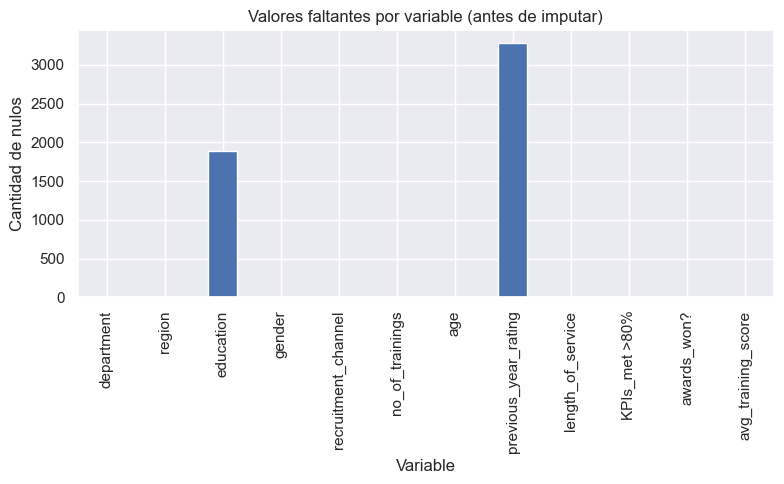

In [207]:
# Representación gráfica
plt.figure(figsize=(8, 5))
missing.plot(kind='bar')
plt.title('Valores faltantes por variable (antes de imputar)')
plt.ylabel('Cantidad de nulos')
plt.xlabel('Variable')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [208]:
#Los empleados que tienen nulo en el rating, son los que tienen 1 año en la empresa, puedo asumir que es un empleado promedio
#y colocarle el promedio de esa columna o del área a la que pertenece

In [209]:
X_train['previous_year_rating'].value_counts()

previous_year_rating
3.0    14854
5.0     9441
4.0     7915
1.0     4976
2.0     3378
Name: count, dtype: int64

In [210]:
X_train['previous_year_rating'].value_counts(dropna = False)

previous_year_rating
3.0    14854
5.0     9441
4.0     7915
1.0     4976
2.0     3378
NaN     3282
Name: count, dtype: int64

In [211]:
#Son valores enteros y Si uso la media...

In [212]:
np.mean(X_train['previous_year_rating'])

np.float64(3.331993886204516)

In [213]:
np.median(X_train['previous_year_rating'].dropna())

np.float64(3.0)

In [214]:
#Ahora con educación: Moda

In [215]:
X_train['education'].value_counts(dropna = False)

education
Bachelor's          29370
Master's & above    11957
NaN                  1895
Below Secondary       624
Name: count, dtype: int64

Separamos las variables categóricas de las numéricas

In [216]:
X_train.select_dtypes('number').head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35058,1,39,5.0,4,1,0,59
16253,1,47,3.0,3,0,0,67
27130,1,58,3.0,28,0,0,71
12559,1,28,4.0,4,0,0,49
14163,1,39,3.0,9,0,0,81


In [217]:
X_train.select_dtypes('object').head()

,department,region,education,gender,recruitment_channel
35058,Operations,region_15,Bachelor's,m,sourcing
16253,Procurement,region_17,Master's & above,f,sourcing
27130,Procurement,region_2,Bachelor's,f,other
12559,Sales & Marketing,region_13,Bachelor's,m,other
14163,Technology,region_20,Master's & above,m,sourcing


In [218]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [219]:
X_train_num.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
35058,1,39,5.0,4,1,0,59
16253,1,47,3.0,3,0,0,67
27130,1,58,3.0,28,0,0,71
12559,1,28,4.0,4,0,0,49
14163,1,39,3.0,9,0,0,81


In [220]:
X_train_cat.head()

,department,region,education,gender,recruitment_channel
35058,Operations,region_15,Bachelor's,m,sourcing
16253,Procurement,region_17,Master's & above,f,sourcing
27130,Procurement,region_2,Bachelor's,f,other
12559,Sales & Marketing,region_13,Bachelor's,m,other
14163,Technology,region_20,Master's & above,m,sourcing


`SimpleImputer` https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [221]:
from sklearn.impute import SimpleImputer

In [222]:
imputer = SimpleImputer(strategy = 'median')

In [223]:
imputer.fit_transform(X_train_num)

array([[ 1., 39.,  5., ...,  1.,  0., 59.],
       [ 1., 47.,  3., ...,  0.,  0., 67.],
       [ 1., 58.,  3., ...,  0.,  0., 71.],
       ...,
       [ 1., 34.,  5., ...,  0.,  0., 49.],
       [ 1., 30.,  3., ...,  0.,  0., 81.],
       [ 2., 36.,  5., ...,  0.,  0., 63.]])

In [224]:
#Por comodidad, convertimos a un dataset:

In [225]:
pd.DataFrame(data = imputer.fit_transform(X_train_num), columns = X_train_num.columns)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,39.0,5.0,4.0,1.0,0.0,59.0
1,1.0,47.0,3.0,3.0,0.0,0.0,67.0
2,1.0,58.0,3.0,28.0,0.0,0.0,71.0
3,1.0,28.0,4.0,4.0,0.0,0.0,49.0
4,1.0,39.0,3.0,9.0,0.0,0.0,81.0
...,...,...,...,...,...,...,...
43841,1.0,24.0,4.0,2.0,0.0,0.0,81.0
43842,1.0,34.0,5.0,5.0,1.0,0.0,62.0
43843,1.0,34.0,5.0,8.0,0.0,0.0,49.0
43844,1.0,30.0,3.0,3.0,0.0,0.0,81.0


In [226]:
X_train_num_imputed = pd.DataFrame(data = imputer.fit_transform(X_train_num), columns = X_train_num.columns)

In [227]:
X_train_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

###### Consolidado (Resumen de pasos tipicos de la explicaicón anterior):

In [228]:
imputer_num = SimpleImputer(strategy= 'median')
imputer_cat = SimpleImputer(strategy= 'most_frequent')

In [229]:
X_train_num_imputed = imputer_num.fit_transform(X_train_num)
X_train_cat_imputed = imputer_cat.fit_transform(X_train_cat)

In [230]:
X_train_num_imputed = pd.DataFrame(data = X_train_num_imputed, columns = X_train_num.columns)
X_train_cat_imputed = pd.DataFrame(data = X_train_cat_imputed, columns = X_train_cat.columns)

In [231]:
X_train_num_imputed.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,1.0,39.0,5.0,4.0,1.0,0.0,59.0
1,1.0,47.0,3.0,3.0,0.0,0.0,67.0


In [232]:
X_train_cat_imputed.head(2)

,department,region,education,gender,recruitment_channel
0,Operations,region_15,Bachelor's,m,sourcing
1,Procurement,region_17,Master's & above,f,sourcing


In [233]:
#Al categórico imputado y numérico imputado, los veo normal, pero si reviso mis nulos:

In [234]:
X_train_num_imputed.isnull().sum()

no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [235]:
X_train_cat_imputed.isnull().sum()

department             0
region                 0
education              0
gender                 0
recruitment_channel    0
dtype: int64

Ya no tenemos valores nulos!

## Capeo de outliers (variables numéricas)

Observamos la distribución de los percentiles más bajos

In [236]:
X_train_num_imputed.describe(percentiles = [0.05, 0.10, 0.15, 0.20, 0.25])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251950,34.820873,3.307143,5.873649,0.352050,0.022921,63.383957
std,0.610654,7.673484,1.215935,4.281273,0.477615,0.149654,13.356721
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
5%,1.000000,25.000000,1.000000,1.000000,0.000000,0.000000,47.000000
10%,1.000000,27.000000,1.000000,2.000000,0.000000,0.000000,48.000000
15%,1.000000,28.000000,2.000000,2.000000,0.000000,0.000000,49.000000
20%,1.000000,28.000000,3.000000,2.000000,0.000000,0.000000,50.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000


Lo mismo para los percentiles más altos

In [237]:
X_train_num_imputed.describe(percentiles = [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251950,34.820873,3.307143,5.873649,0.352050,0.022921,63.383957
std,0.610654,7.673484,1.215935,4.281273,0.477615,0.149654,13.356721
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
90%,2.000000,46.000000,5.000000,11.000000,1.000000,0.000000,83.000000
91%,2.000000,47.000000,5.000000,12.000000,1.000000,0.000000,84.000000
92%,2.000000,48.000000,5.000000,12.000000,1.000000,0.000000,84.000000
93%,2.000000,49.000000,5.000000,13.000000,1.000000,0.000000,85.000000
94%,2.000000,50.000000,5.000000,14.000000,1.000000,0.000000,85.000000


Utilizamos el p99 para capear los valores más altos

<Axes: xlabel='length_of_service', ylabel='count'>

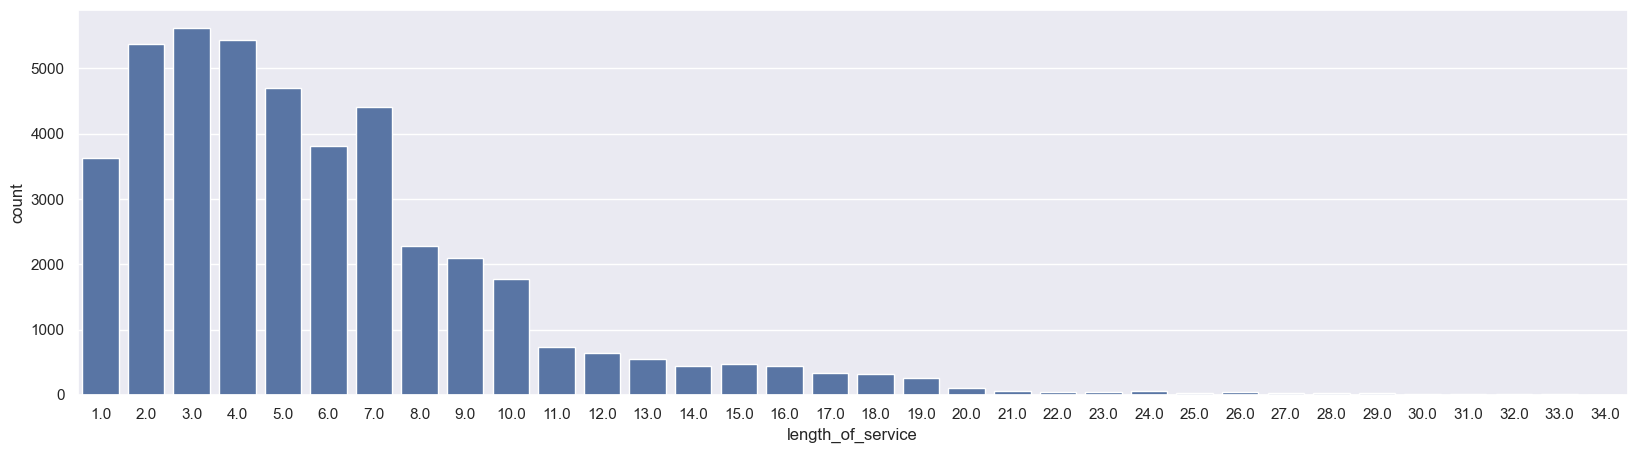

In [238]:
plt.figure(figsize = (20, 5))
sns.countplot(data = X_train_num_imputed, x = 'length_of_service')

In [239]:
#Función clip:
a = np.array([-10,10,20,30,40,50,60,70,1000])
a

array([ -10,   10,   20,   30,   40,   50,   60,   70, 1000])

In [240]:
np.clip(a, 0 , 100)

array([  0,  10,  20,  30,  40,  50,  60,  70, 100])

In [241]:
#Calculamos percentiles:
np.percentile(X_train_num_imputed['length_of_service'], 99)

np.float64(20.0)

In [242]:
np.percentile(X_train_num_imputed['length_of_service'], 0)

np.float64(1.0)

In [243]:
#Resumen - consolidado:

In [244]:
columna ='length_of_service'

p0 = np.percentile(X_train_num_imputed[columna], 0)
p99 = np.percentile(X_train_num_imputed[columna], 99)

In [245]:
#Reemplazo mi columna con el clip:

In [246]:
X_train_num_imputed[columna] = np.clip(X_train_num_imputed[columna], p0, p99)

<Axes: xlabel='length_of_service', ylabel='count'>

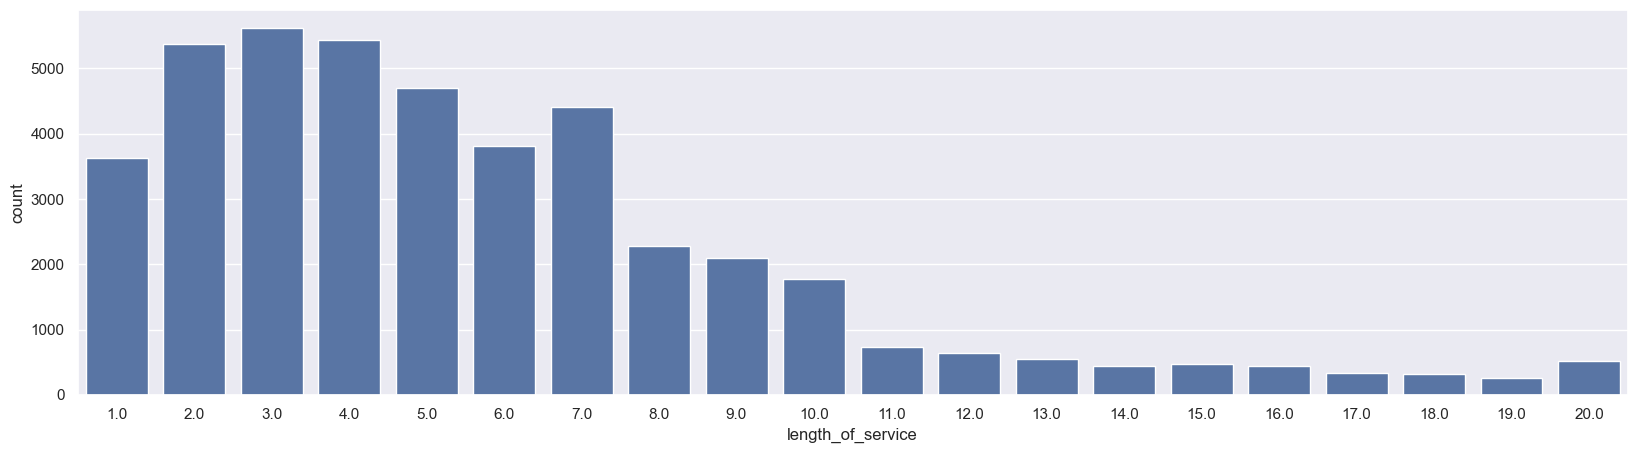

In [247]:
plt.figure(figsize = (20, 5))
sns.countplot(data = X_train_num_imputed, x = 'length_of_service')

In [248]:
X_train_num_imputed.describe(percentiles = np.arange(0.9, 1, 0.01))

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000,43846.000000
mean,1.251950,34.820873,3.307143,5.824522,0.352050,0.022921,63.383957
std,0.610654,7.673484,1.215935,4.072022,0.477615,0.149654,13.356721
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,40.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
90%,2.000000,46.000000,5.000000,11.000000,1.000000,0.000000,83.000000
91%,2.000000,47.000000,5.000000,12.000000,1.000000,0.000000,84.000000
92%,2.000000,48.000000,5.000000,12.000000,1.000000,0.000000,84.000000
93%,2.000000,49.000000,5.000000,13.000000,1.000000,0.000000,85.000000
94%,2.000000,50.000000,5.000000,14.000000,1.000000,0.000000,85.000000


<Axes: xlabel='no_of_trainings', ylabel='count'>

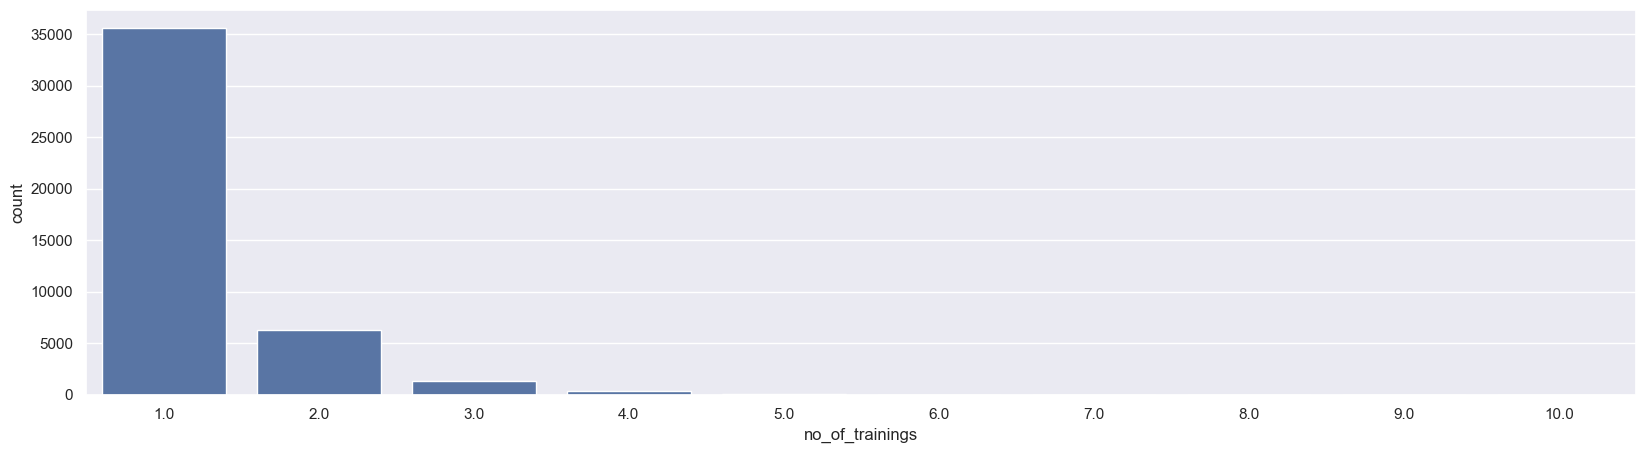

In [249]:
plt.figure(figsize = (20, 5))
sns.countplot(data = X_train_num_imputed, x = 'no_of_trainings')


In [250]:
columna2 ='no_of_trainings'
p0 = np.percentile(X_train_num_imputed[columna2], 0)
p99 = np.percentile(X_train_num_imputed[columna2], 99)

In [251]:
X_train_num_imputed[columna2] = np.clip(X_train_num_imputed[columna2], p0, p99)

<Axes: xlabel='no_of_trainings', ylabel='count'>

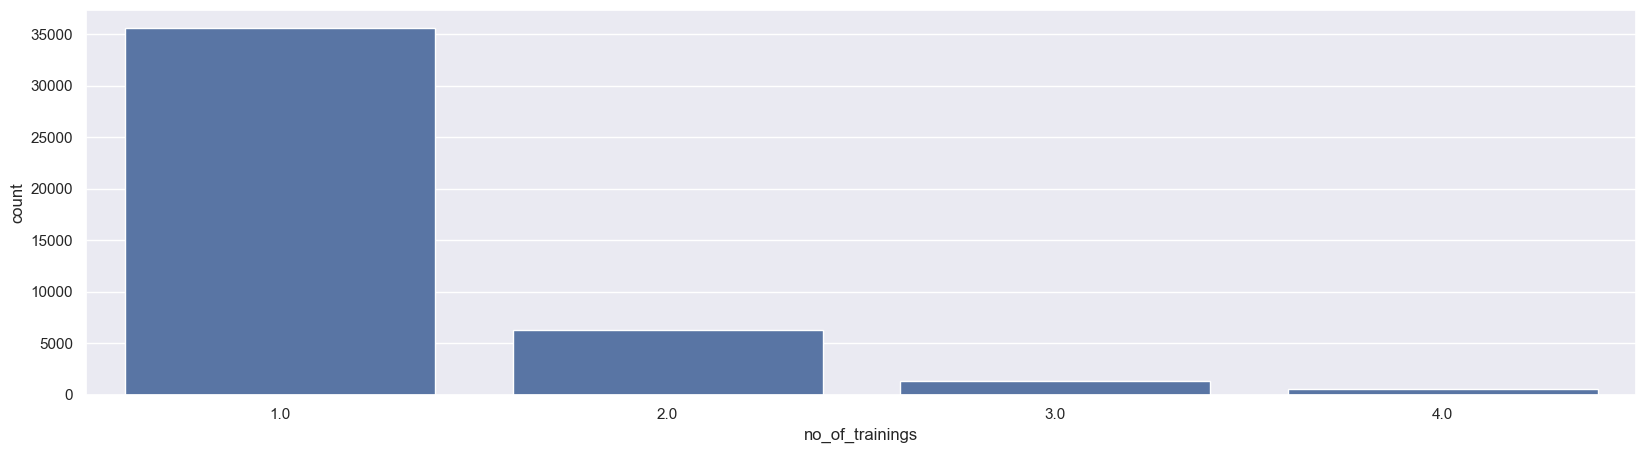

In [252]:
plt.figure(figsize = (20, 5))
sns.countplot(data = X_train_num_imputed, x = 'no_of_trainings')

Durante el preprocesamiento de los datos, se identificaron valores atípicos significativos en las variables “no_of_trainings” y “length_of_service”, especialmente en sus valores máximos, los cuales se encontraban considerablemente alejados del rango habitual. Para mitigar su impacto y reducir el riesgo de sesgo en los análisis posteriores, se aplicó una técnica de recorte basada en percentiles. Específicamente, se utilizaron los percentiles 0 y 99 como límites inferiores y superiores, respectivamente, lo que permitió conservar la mayoría de los datos relevantes mientras se eliminaban valores extremos no representativos del comportamiento general. Esta estrategia asegura una mayor robustez en los modelos posteriores y mejora la calidad del dataset.

## Generación de dummies

Aplicamos one hot encoding a las variables categóricas

In [253]:
X_train_cat_imputed.head()

,department,region,education,gender,recruitment_channel
0,Operations,region_15,Bachelor's,m,sourcing
1,Procurement,region_17,Master's & above,f,sourcing
2,Procurement,region_2,Bachelor's,f,other
3,Sales & Marketing,region_13,Bachelor's,m,other
4,Technology,region_20,Master's & above,m,sourcing


In [254]:
pd.get_dummies(X_train_cat_imputed.head())
#4 valores de departamento genera 4 columnas, pero hay información redundante, evidente.

,department_Operations,department_Procurement,department_Sales & Marketing,department_Technology,region_region_13,region_region_15,region_region_17,region_region_2,region_region_20,education_Bachelor's,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_sourcing
0,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True
1,False,True,False,False,False,False,True,False,False,False,True,True,False,False,True
2,False,True,False,False,False,False,False,True,False,True,False,True,False,True,False
3,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False
4,False,False,False,True,False,False,False,False,True,False,True,False,True,False,True


In [255]:
pd.get_dummies(X_train_cat_imputed.head(), drop_first=True)
#Elimina una columna para cada uno (ejm: genero)

,department_Procurement,department_Sales & Marketing,department_Technology,region_region_15,region_region_17,region_region_2,region_region_20,education_Master's & above,gender_m,recruitment_channel_sourcing
0,False,False,False,True,False,False,False,False,True,True
1,True,False,False,False,True,False,False,True,False,True
2,True,False,False,False,False,True,False,False,False,False
3,False,True,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,True,True,True,True


In [256]:
#Ahora si generamos nuestras variables en una sola línea:

In [257]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True)

In [258]:
X_train_cat_dummies.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,True


Para el tratamiento de las variables cualitativas nominales como “department”, “región”, “education”, “gender” y “recruitment_channel”, se decidió transformarlas mediante la creación de variables dummys. Este procedimiento consistió en descomponer cada variable en nuevas columnas que representen sus categorías de forma binaria (0 o 1), facilitando así su análisis cuantitativo.
Con el objetivo de evitar redundancia en la información y problemas de dependencia entre columnas, se eliminó una categoría por cada variable transformada. Esto permite conservar la interpretación completa de los datos sin duplicar significados en el conjunto final.

## Consolidación

## Resumen

Se separaron las variables numéricas y categóricas para aplicar diferentes tipos de preprocesamiento. Una vez procesadas, se unieron nuevamente utilizando pd.concat con axis=1, generando el DataFrame X_train_total que contiene todas las variables listas para el modelo. Luego, se verificó su forma con .shape, obteniendo un total de 43,846 filas y 53 columnas. Finalmente, se visualizó con .head para confirmar que la unión se realizó correctamente.

In [259]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis = 1)

Une los dos DataFrames:

X_train_num_imputed (variables numéricas ya imputadas)

X_train_cat_dummies (variables categóricas transformadas en variables dummies)

Usamos pd.concat(..., axis=1) para juntarlos por columnas (horizontalmente), formando un solo DataFrame llamado X_train_total.

In [260]:
X_train_total.shape

(43846, 53)

Devuelve una tupla con el número de filas y columnas del DataFrame X_train_total.

Significa que el conjunto de entrenamiento tiene 43,846 registros (filas) y 53 variables (columnas) después de haber unido las variables numéricas con las categóricas transformadas en dummies. Además que es una forma rápida de verificar si la unión de datos se hizo correctamente.

In [261]:
X_train_total.head(5)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,39.0,5.0,4.0,1.0,0.0,59.0,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1.0,47.0,3.0,3.0,0.0,0.0,67.0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,1.0,58.0,3.0,20.0,0.0,0.0,71.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,28.0,4.0,4.0,0.0,0.0,49.0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,1.0,39.0,3.0,9.0,0.0,0.0,81.0,False,False,False,...,False,False,False,False,False,False,True,True,False,True


Muestra las primeras 5 filas del DataFrame X_train_total. Esto nos sirve para revisar visualmente que los datos estén bien unidos.



## Escalamiento

In [262]:
#Se está utilizando el MinMaxScaler, que ajusta los valores de cada característica para que estén entre 0 y 1,
#lo que facilita el trabajo de algunos algoritmos que son sensibles a la escala de los datos

In [263]:
from sklearn.preprocessing import MinMaxScaler

In [264]:
scaler = MinMaxScaler()

In [265]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_total), columns = X_train_total.columns)
X_train_scaled.head(2)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.0,0.475,1.0,0.157895,1.0,0.0,0.322034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.675,0.5,0.105263,0.0,0.0,0.457627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [266]:
X_train_scaled.shape

(43846, 53)

Al realizar el escalamiento nos aseguramps de que cada una de las 53 columnas contribuya de manera equitativa a la predicción. Esto no solo hace que el modelo sea más justo y menos sesgado por la magnitud de los datos, sino que también mejora la robustez del mismo. Lo que hace que el modelo sea más estable y converja de manera más eficiente durante el entrenamiento.

## Replicar el preprocesamiento en la data de test

In [267]:
X_test.shape

(10962, 12)

In [268]:
X_test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
9351,Procurement,region_23,Bachelor's,m,other,1,27,4.0,2,0,0,69
7289,Procurement,region_15,Master's & above,m,other,1,45,3.0,18,0,0,67
22339,Analytics,region_32,Bachelor's,m,other,2,36,2.0,3,0,0,82
23422,Technology,region_1,Bachelor's,f,sourcing,1,28,5.0,5,1,0,75
36639,Sales & Marketing,region_7,Bachelor's,f,sourcing,1,34,2.0,10,1,0,52


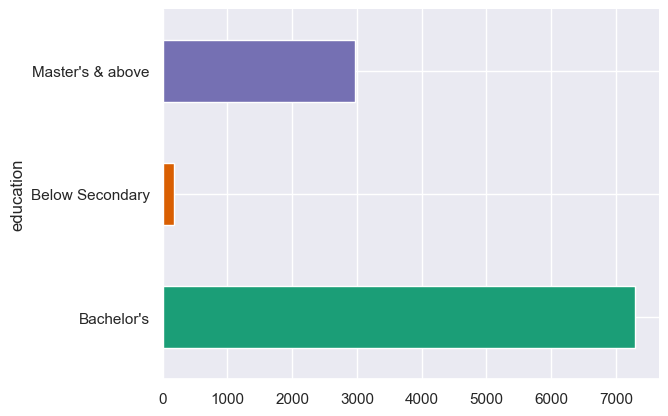

In [269]:
from matplotlib import pyplot as plt
import seaborn as sns
X_test.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [270]:
#Nos muestra la distribución de la educación entre los empleados del df
# test, permitiéndonos observar que la mayoría de ellos son bachelor's y que
# muy pocos cuentan con la secundaria completa


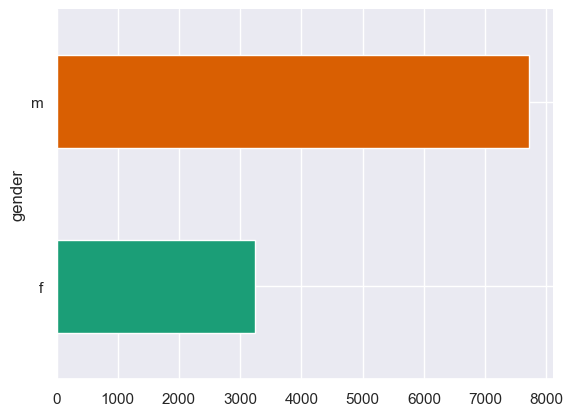

In [271]:
from matplotlib import pyplot as plt
import seaborn as sns
X_test.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [272]:
# Podemos observar que alredor de 8000 colaboradores son hombre mientras que
# 3000 son mujeres %% [markdown] imputación %%

imputación

In [273]:
X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')

In [274]:
X_test_num_imputed = imputer_num.transform(X_test_num)
X_test_cat_imputed = imputer_cat.transform(X_test_cat)

In [275]:
X_test_num_imputed = pd.DataFrame(data = X_test_num_imputed, columns = X_test_num.columns)
X_test_cat_imputed = pd.DataFrame(data = X_test_cat_imputed, columns = X_test_cat.columns)

In [276]:
# Para la imputación de los datos, es fundamental primero separa cuales son
# cuantitativos y cualitativoa para poder tener una mejor calidad de los datos
# que se vayan a testear %% [markdown] Capeo de outliers %%

Capeo de outliers

In [277]:
columna = 'length_of_service'

X_test_num_imputed[columna] = np.clip(X_test_num_imputed[columna], p0, p99)

In [278]:
columna2 = 'no_of_trainings'

X_test_num_imputed[columna2] = np.clip(X_test_num_imputed[columna2], p0, p99)

In [279]:
# Una vez identificado los tipos de datos, comenzamos con los datos númericos.
# Hemos identificado datos atípicos de las columnas "Lenght_of_service" y
# "No_of_trainings", por ende realizamos el capeo de los valores atípicios a
# través de los valores del percentil 99

Generación de dummies

In [280]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

In [281]:
# Para el tratamiento de las variables cualitativas nominales como
# “department”, “región”, “education”, “gender” y
# “recruitment_channel”, se decidió transformarlas mediante la creación de
# variables dummys. Este procedimiento consistió en descomponer cada variable
# en nuevas columnas que representen sus categorías de forma binaria (0 o 1),
# facilitando así su análisis cuantitativo. Con el objetivo de evitar
# redundancia en la información y problemas de dependencia entre columnas, se
# eliminó una categoría por cada variable transformada. Esto permite conservar
# la interpretación completa de los datos sin duplicar significados en el
# conjunto final

Consolidación

In [282]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [283]:
# Una vez realizado esos pasos se consolida el capeo e imputación de los datos en el "X_test_total"

Escalamiento

In [284]:
X_test_scaled = pd.DataFrame(data = scaler.transform(X_test_total), columns = X_test_total.columns)
X_test_scaled.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0.000000,0.175,0.75,0.052632,0.0,0.0,0.491525,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.625,0.50,0.157895,0.0,0.0,0.457627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.333333,0.400,0.25,0.105263,0.0,0.0,0.711864,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.200,1.00,0.157895,1.0,0.0,0.593220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.350,0.25,0.157895,1.0,0.0,0.203390,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [285]:
X_test_scaled.shape

(10962, 53)

In [286]:
# Por último se entrena el modelo con los pasos anteriores realizados, y asi se obtiene un mejor entrenamiento y por ende un modelo robusto

## Guardar datasets preprocesados

Creación de copias de los datasets preprocesados:
X_train_export y X_test_export son copias de los datasets escalados (preprocesados). La razón para hacer esto es que, si más adelante necesitas hacer modificaciones a los datos, tienes una copia separada para trabajar con ella sin afectar el dataset original.

In [287]:
X_train_export = X_train_scaled.copy()
X_test_export = X_test_scaled.copy()

Agregar la columna del objetivo (target):Agregando la columna objetivo (el target o etiqueta) a los datasets de entrenamiento y prueba, respectivamente.

In [288]:
X_train_export[target] = y_train.values
X_test_export[target] = y_test.values

Guardar los datasets en formato CSV:

In [289]:
X_train_export.to_csv('preprocessed_train.csv', index = False)
X_test_export.to_csv('preprocessed_test.csv', index = False)

In [290]:
#Puedo entrenar con el train de esta data y probar en su test

## Balanceo

In [291]:
import imblearn

In [292]:
imblearn.__version__

'0.13.0'

In [293]:
y_train.value_counts()

is_promoted
0    40112
1     3734
Name: count, dtype: int64

In [294]:
y_train.mean()
#Una tasa del 8% -> Buscamos un 20/25% para que este mejor representando la cantidad de "1"

np.float64(0.08516170232176254)

In [295]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [296]:
ros = RandomOverSampler(sampling_strategy = 0.25)

In [297]:
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)

Matriz de Confusión (umbral ajustado):
[[9625  403]
 [ 507  427]]

 Reporte de Clasificación (umbral ajustado):
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10028
           1       0.51      0.46      0.48       934

    accuracy                           0.92     10962
   macro avg       0.73      0.71      0.72     10962
weighted avg       0.91      0.92      0.91     10962



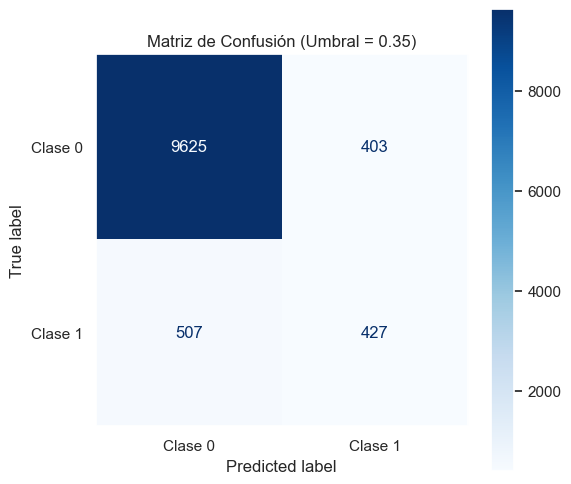

In [298]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Crear modelo con class_weight='balanced'
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_ros, y_ros)

# 2. Predecir probabilidades sobre el test
y_proba = rf_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidad de clase 1

# 3. Ajustar el umbral manualmente
umbral = 0.35
y_pred = (y_proba >= umbral).astype(int)

# 4. Evaluar resultados
print("Matriz de Confusión (umbral ajustado):")
print(confusion_matrix(y_test, y_pred))

print("\n Reporte de Clasificación (umbral ajustado):")
print(classification_report(y_test, y_pred))

# 5. Mostrar la matriz de confusión de forma visual
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                              display_labels=["Clase 0", "Clase 1"])
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues")
plt.title(f"Matriz de Confusión (Umbral = {umbral})")
plt.grid(False)
plt.show()

# Conclusión
El modelo de Random Forest, con un umbral ajustado a 0.35, muestra un buen desempeño general (accuracy del 92%). En el grafico nos nuestra en la Precision en la clase 0: 95% muy buena, casi todo lo que se predijo como clase 0 es correcto y clase 1es 51% solo la mitad de las veces que predijiste clase 1, era realmente clase 1. En cuanto a la Recall en la clase 0: 96% detecta correctamente la gran mayoría de los casos clase 0 y clase 1: 46% está perdiendo más de la mitad de los casos reales de clase 1.

In [299]:
y_train.value_counts()

is_promoted
0    40112
1     3734
Name: count, dtype: int64

In [300]:
y_ros.value_counts()

is_promoted
0    40112
1    10028
Name: count, dtype: int64

### Exportar datasets balanceados

Se está creando una copia de este dataset balanceado para trabajar con ella sin modificar el dataset original. La razón para hacer una copia es que, en muchos casos, puedes querer mantener el original intacto por si necesitas volver a él más adelante.

In [301]:
X_train_export = X_ros.copy()
X_train_export[target] = y_ros.values

X_train_export.to_csv('preprocessed_train_20.csv', index = False)

In [302]:
#Luego puedo entrenar el modelo con esta data de train y probar con el test de líneas arriba (antes de balancear)

Importación de librerías

In [303]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

seed = 2020
sns.set()

Lectura de datos

In [304]:
df_train = pd.read_csv('preprocessed_train.csv')
df_test = pd.read_csv('preprocessed_test.csv')

In [305]:
df_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,0.0,0.475,1.00,0.157895,1.0,0.0,0.322034,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.0,0.675,0.50,0.105263,0.0,0.0,0.457627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
2,0.0,0.950,0.50,1.000000,0.0,0.0,0.525424,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.200,0.75,0.157895,0.0,0.0,0.152542,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.0,0.475,0.50,0.421053,0.0,0.0,0.694915,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0


In [306]:
df_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,is_promoted
0,0.000000,0.175,0.75,0.052632,0.0,0.0,0.491525,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.000000,0.625,0.50,0.157895,0.0,0.0,0.457627,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
2,0.333333,0.400,0.25,0.105263,0.0,0.0,0.711864,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.000000,0.200,1.00,0.157895,1.0,0.0,0.593220,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.000000,0.350,0.25,0.157895,1.0,0.0,0.203390,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [307]:
target = 'is_promoted'

In [308]:
X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

X_test = df_test.drop(target, axis = 1)
y_test = df_test[target]

In [309]:
y_train.mean()

np.float64(0.08516170232176254)

In [310]:
y_test.mean()

np.float64(0.08520343003101624)

Entrenamiento

In [311]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [312]:
rf = RandomForestClassifier()

In [313]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [314]:
X_train.shape

(43846, 53)

In [329]:
params = {'n_estimators': [25, 50, 100, 200, 400],
          'max_depth': [5, 10, 25, 50],
          'min_samples_split': [25, 50, 100, 250, 500, 1000, 2000, 4000]}

In [330]:
gs = GridSearchCV(estimator=rf, param_grid= params, scoring='f1', n_jobs=-1)

Al usar n_jobs=-1, GridSearchCV puede probar varias combinaciones de hiperparámetros en paralelo, lo que puede acelerar significativamente el proceso, especialmente si tienes una máquina con varios núcleos o estás probando un gran número de combinaciones de parámetros.

Comentarle que a partir de esta linea, el código se demora en correr

In [331]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25, 50],
                         'min_samples_split': [25, 50, 100, 250, 500, 1000,
                                               2000, 4000],
                         'n_estimators': [25, 50, 100, 200, 400]},
             scoring='f1')

In [332]:
best_rf = gs.best_estimator_
best_rf

RandomForestClassifier(max_depth=50, min_samples_split=25)

In [333]:
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

In [334]:
from sklearn.metrics import classification_report

In [335]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     40112
           1       0.98      0.32      0.48      3734

    accuracy                           0.94     43846
   macro avg       0.96      0.66      0.72     43846
weighted avg       0.94      0.94      0.93     43846



In [336]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.96      0.29      0.45       934

    accuracy                           0.94     10962
   macro avg       0.95      0.65      0.71     10962
weighted avg       0.94      0.94      0.92     10962



Obtuvimos el mejor f1-score en el conjunto de test utilizando

El dataset de entrenamiento preprocessed_train.csv
Random Forest con n_estimators = 200, max_depth = 50 y min_samples_split = 25

=== Resultados en Conjunto de Entrenamiento ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     40112
           1       0.85      0.14      0.24      3734

    accuracy                           0.92     43846
   macro avg       0.89      0.57      0.60     43846
weighted avg       0.92      0.92      0.90     43846


=== Resultados en Conjunto de Prueba ===
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     10028
           1       0.83      0.16      0.26       934

    accuracy                           0.93     10962
   macro avg       0.88      0.58      0.61     10962
weighted avg       0.92      0.93      0.90     10962



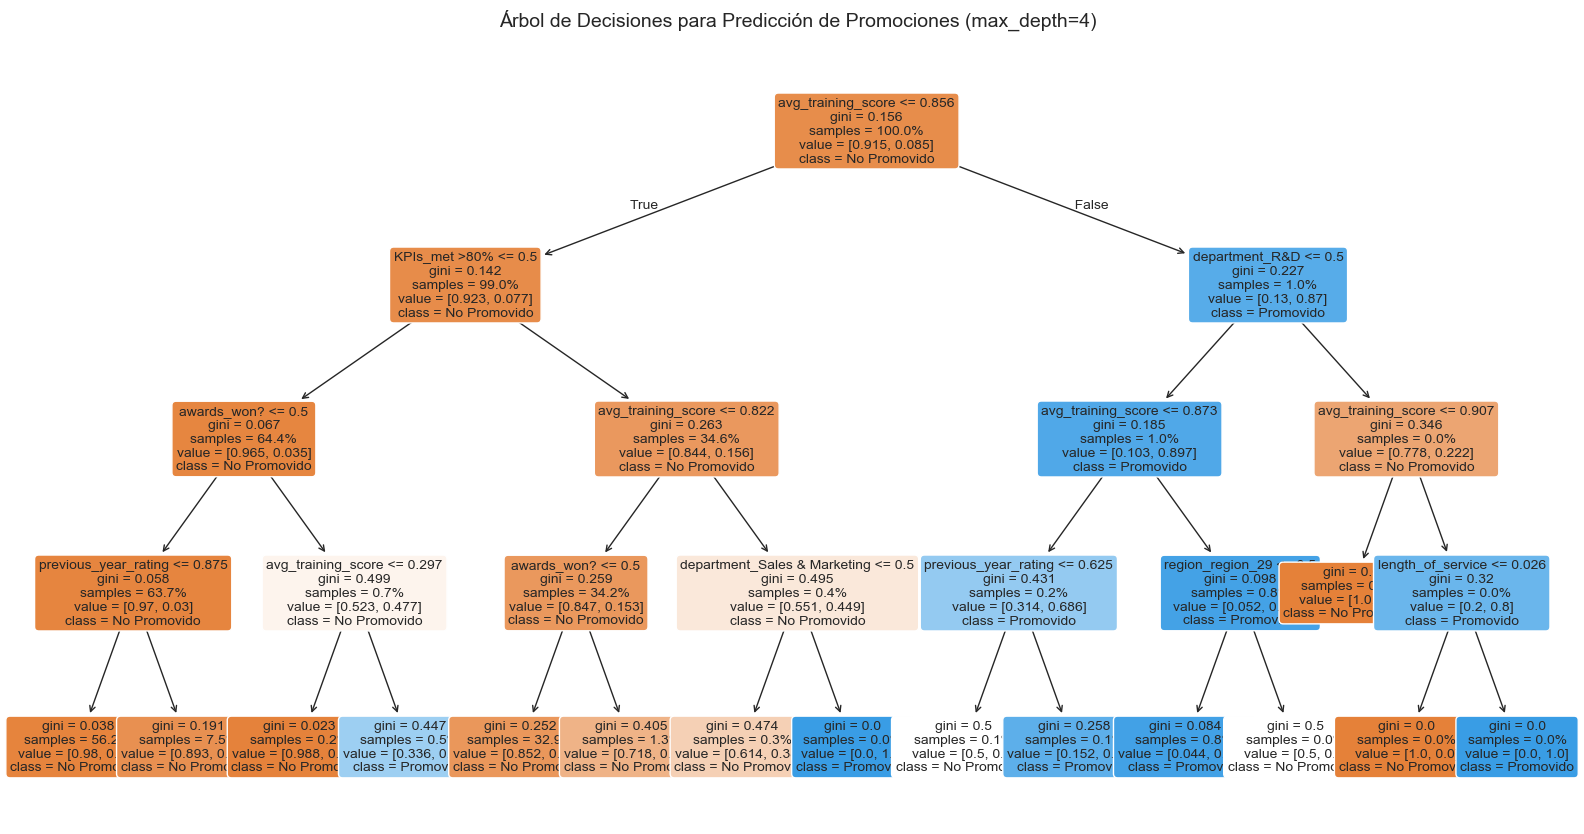


=== Top 10 Características Más Importantes ===
                         Feature  Importance
6             avg_training_score    0.564141
4                  KPIs_met >80%    0.248109
5                    awards_won?    0.118664
2           previous_year_rating    0.042796
12                department_R&D    0.013500
13  department_Sales & Marketing    0.009307
35              region_region_29    0.002109
3              length_of_service    0.001374
1                            age    0.000000
8                  department_HR    0.000000


In [338]:
# Importar librerías necesarias
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Modelo de árbol de decisiones con max_depth=4
dt_model_4 = DecisionTreeClassifier(max_depth=4, random_state=2020)

# Entrenar el modelo
dt_model_4.fit(X_train, y_train)

# Hacer predicciones
y_train_pred_dt4 = dt_model_4.predict(X_train)
y_test_pred_dt4 = dt_model_4.predict(X_test)

# Evaluar el modelo
print("=== Resultados en Conjunto de Entrenamiento ===")
print(classification_report(y_train, y_train_pred_dt4))
print("\n=== Resultados en Conjunto de Prueba ===")
print(classification_report(y_test, y_test_pred_dt4))

# Visualizar el árbol de decisiones
plt.figure(figsize=(20, 10))
plot_tree(dt_model_4, 
          feature_names=X_train.columns, 
          class_names=['No Promovido', 'Promovido'], 
          filled=True, 
          rounded=True,
          proportion=True,
          fontsize=10)
plt.title("Árbol de Decisiones para Predicción de Promociones (max_depth=4)", pad=20, fontsize=14)
plt.show()

# Importancia de características
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model_4.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n=== Top 10 Características Más Importantes ===")
print(feature_importance.head(10))

# Conclusión
En general, los empleados con un puntaje de entrenamiento bajo (≤ 0.856) tienen muy baja probabilidad de ser promovidos, especialmente si además no cumplieron más del 80% de sus KPIs o no ganaron premios. En esta sección del árbol, la mayoría de los nodos predicen “No Promovido”, con valores de Gini bajos (alta pureza), lo que indica que el modelo tiene alta confianza en esas predicciones.

La imagen muestra el ranking de las 10 características más importantes utilizadas por un modelo (como el árbol de decisión anterior) para predecir si un empleado será promovido. Cada característica tiene un valor de "importancia", que indica qué tan influyente fue para tomar decisiones dentro del modelo. Estos valores van de 0 a 1, y su suma total es 1.

El modelo se apoya fuertemente en el desempeño cuantificable: la calidad del entrenamiento, los resultados clave y los premios. Variables personales o de ubicación tienen muy poco o ningún peso, lo que puede considerarse positivo en términos de equidad y objetividad del proceso de evaluación.